#Importar Pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Leitura e visão inicial dos dados

In [ ]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
#DatFrame Auxiliar

aux = pd.DataFrame({'colunas': df.columns, 'tipo': df.dtypes, 'missing': df.isna().sum(), 'size':df.shape[0], 'unicos':df.nunique()})
aux ['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
encounter_id,encounter_id,int64,0,101766,101766,0.0
patient_nbr,patient_nbr,int64,0,101766,71518,0.0
race,race,object,0,101766,6,0.0
gender,gender,object,0,101766,3,0.0
age,age,object,0,101766,10,0.0
weight,weight,object,0,101766,10,0.0
admission_type_id,admission_type_id,int64,0,101766,8,0.0
discharge_disposition_id,discharge_disposition_id,int64,0,101766,26,0.0
admission_source_id,admission_source_id,int64,0,101766,17,0.0
time_in_hospital,time_in_hospital,int64,0,101766,14,0.0


In [ ]:
aux [aux['unicos'] == 1].index

Index(['examide', 'citoglipton'], dtype='object')

In [ ]:
#Dropar colunas com valores únicos
col_unicas= aux[aux['unicos']==1].index
df.drop(col_unicas, 1, inplace = True)

In [ ]:
#Valores faltantes
df == '?'
df[df == '?'].count() #7 categorias com valores faltantes

In [ ]:
#Transforma todos os '?' em valores nulos
df = df.replace('?', np.nan)

In [ ]:
!pip install missingno

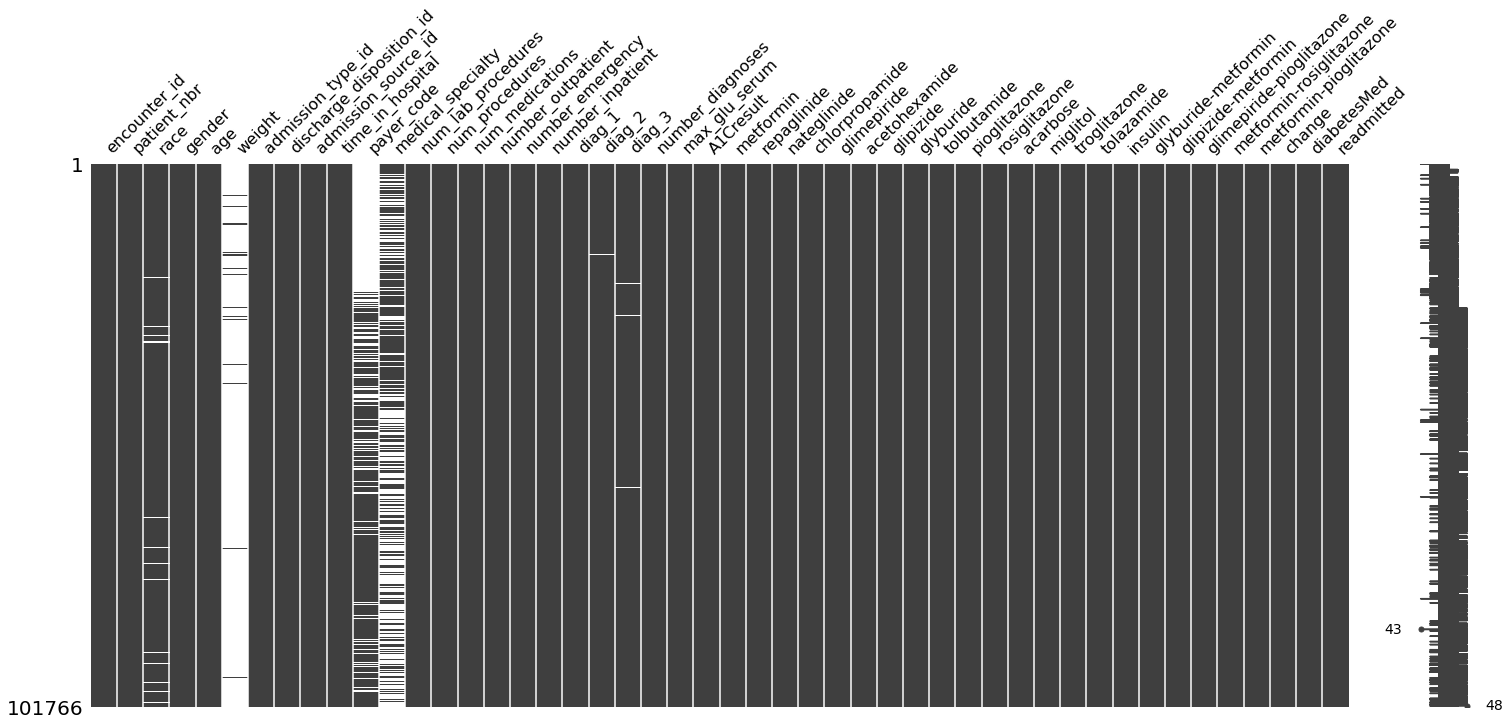

In [ ]:
import missingno as msno
msno.matrix(df) #visualiza dados faltantes em uma matriz

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
cids = ['diag_1','diag_2','diag_3']
#https://icd.codes/icd9cm doc com o código de cada doença
for col in cids: #valores faltantes e categorias com str serão tratados como 'outros'
  df.loc[df[col].str.contains('V') | df[col].isnull() | df[col].str.contains('E'), col] = 1001

In [ ]:
df[cids] = df[cids].fillna(1001)

In [ ]:
df[cids] = df[cids].astype('float64')

In [ ]:
#1° Separa a coluna em números para que as operações de comparações possam ser feitas
for col in cids:
        df.loc[df[col] <= 139, col] = 1
        df.loc[(df[col] > 139) & (df[col] <= 239), col] = 2
        df.loc[(df[col] > 239) & (df[col] <= 279), col] = 3
        df.loc[(df[col] > 279) & (df[col] <= 289), col] = 4
        df.loc[(df[col] > 289) & (df[col] <= 319), col] = 5
        df.loc[(df[col] > 319) & (df[col] <= 389), col] = 6
        df.loc[(df[col] > 389) & (df[col] <= 459), col] = 7
        df.loc[(df[col] > 459) & (df[col] <= 519), col] = 8
        df.loc[(df[col] > 519) & (df[col] <= 579), col] = 9
        df.loc[(df[col] > 579) & (df[col] <= 629), col] = 10
        df.loc[(df[col] > 629) & (df[col] <= 679), col] = 11
        df.loc[(df[col] > 679) & (df[col] <= 709), col] = 12
        df.loc[(df[col] > 709) & (df[col] <= 739), col] = 13
        df.loc[(df[col] > 739) & (df[col] <= 759), col] = 14
        df.loc[(df[col] > 759) & (df[col] <= 779), col] = 15
        df.loc[(df[col] > 779) & (df[col] <= 799), col] = 16
        df.loc[(df[col] > 799) & (df[col] <= 999), col] = 17

In [ ]:
#transformar as colunas de números em categorias de acordo com a documentação
for col in cids:
        df.loc[df[col] == 1, col] = 'infectious and parasitic diseases'
        df.loc[df[col] == 2, col] = 'neoplasms'
        df.loc[df[col] == 3, col] = 'endocrine, nutritional and metabolic diseases, and immunity disorders'
        df.loc[df[col] == 4, col] = 'diseases of the blood and blood-forming organs'
        df.loc[df[col] == 5, col] = 'mental disorders'
        df.loc[df[col] == 6, col] = 'diseases of the nervous system and sense organs'
        df.loc[df[col] == 7, col] = 'diseases of the circulatory system'
        df.loc[df[col] == 8, col] = 'diseases of the respiratory system'
        df.loc[df[col] == 9, col] = 'diseases of the digestive system'
        df.loc[df[col] == 10, col] = 'diseases of the genitourinary system'
        df.loc[df[col] == 11, col] = 'complications of pregnancy, childbirth, and the puerperium'
        df.loc[df[col] == 12, col]= 'diseases of the skin and subcutaneous tissue'
        df.loc[df[col] == 13, col] = 'diseases of the musculoskeletal system and connective tissue'
        df.loc[df[col] == 14, col] = 'congenital anomalies'
        df.loc[df[col] == 15, col] = 'certain conditions originating in the perinatal period'
        df.loc[df[col] == 16, col] = 'symptoms, signs, and ill-defined conditions'
        df.loc[df[col] == 17, col] = 'injury and poisoning'
        df.loc[df[col] == 1001, col] = 'other'

#Valores Missing

In [ ]:
df.isnull().sum() #visualizar valores faltantes

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
df['payer_code'].value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [ ]:
df[df['payer_code'] != 'FR'] #filtra todos os valores que não sejam FR

In [ ]:
df = df[df['payer_code'] != 'FR'] #agora nosso dataframe será esse novo filtrado, sem o FR

In [ ]:
df['payer_code'].fillna('Missing', inplace = True) #coloca no modelo a informação de valores faltantes

In [ ]:
df['payer_code'].value_counts()

In [ ]:
df ['medical_specialty'].value_counts()

In [ ]:
df.drop(['weight','medical_specialty'],1, inplace = True) #dropa essas categorias por elas possuirem muitos dados faltantes

In [ ]:
df['race'].value_counts()

In [ ]:
df.dropna(inplace=True) #dropa toda linha que for faltante dessa categoria, no caso 2273 linhas
#caso add 1(eixo) como parametro, ele retiraria as COLUNAS com valores faltantes

In [ ]:
df = df.drop(['encounter_id','patient_nbr'],1)
#valores de identificadores ñ trazem muita relevância e possuem muitos valores únicos
#isso pode prejudicar o modelo por ter muitas variaveis nele

#Formatação de Features

In [ ]:
ids = ['admission_type_id','discharge_disposition_id','admission_source_id']
df[ids] = df[ids].astype('object') #formata as colunas para o formato objeto, deixam de ser números e viram objetos

#EDA (Exploratory Data Analysis)

In [ ]:
df.head(3)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Missing,41,0,1,0,0,0,"endocrine, nutritional and metabolic diseases,...",other,other,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,Missing,59,0,18,0,0,0,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,Missing,11,5,13,2,0,1,"complications of pregnancy, childbirth, and th...","endocrine, nutritional and metabolic diseases,...",other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [ ]:
#target
df.readmitted.value_counts() #taxa de readimissão

NO     53317
>30    35007
<30    11169
Name: readmitted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


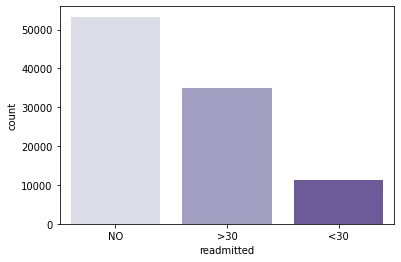

In [ ]:
sns.countplot(df.readmitted, palette='Purples')

In [ ]:
#Glicose máxima sérica
df.max_glu_serum.value_counts()

None    94203
Norm     2571
>200     1466
>300     1253
Name: max_glu_serum, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


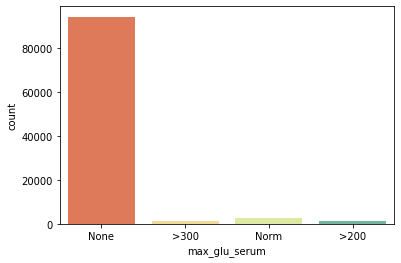

In [ ]:
sns.countplot(df.max_glu_serum, palette='Spectral')

In [ ]:
#Hemoglobina Glicada
df.A1Cresult.value_counts()

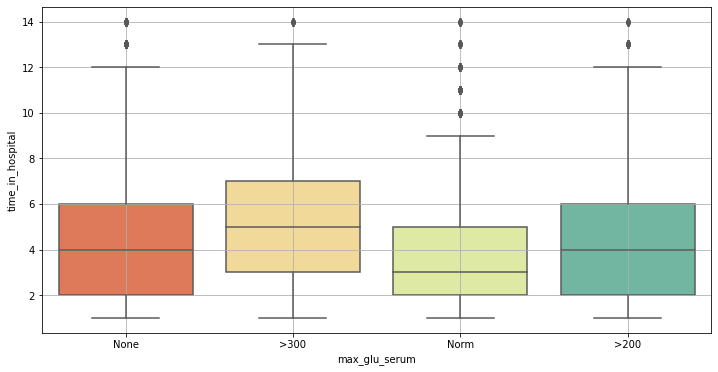

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='max_glu_serum',y='time_in_hospital', palette='Spectral')
plt.grid()
#visualizar as medias, outlinears etc

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


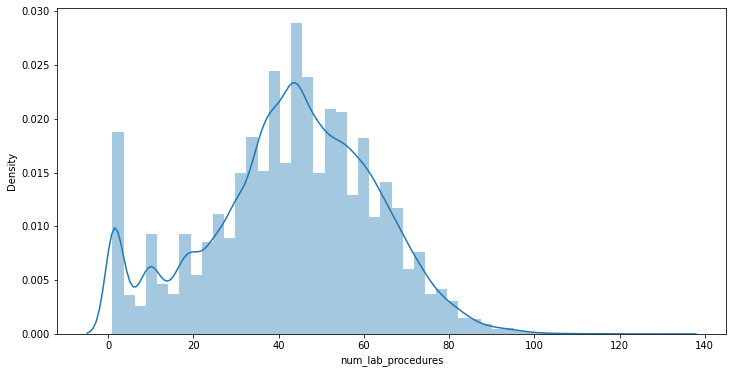

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['num_lab_procedures'])
#distribuição para valores contínuos
#se tivesse um valor MUITO longe da media que o 40 saberiamos tem algo errado com esse dado

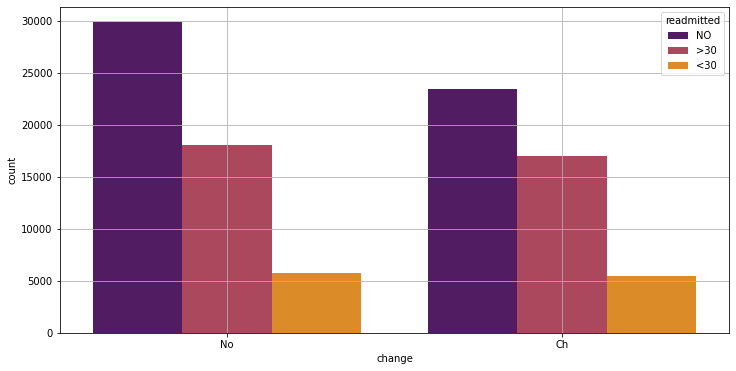

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='change', hue='readmitted', palette='inferno' )
#a variavel change indica se houve trocas de medicações
plt.grid()

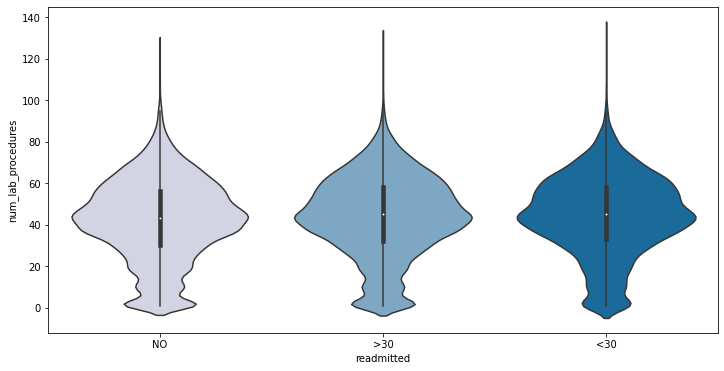

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='readmitted', y='num_lab_procedures', palette='PuBu')

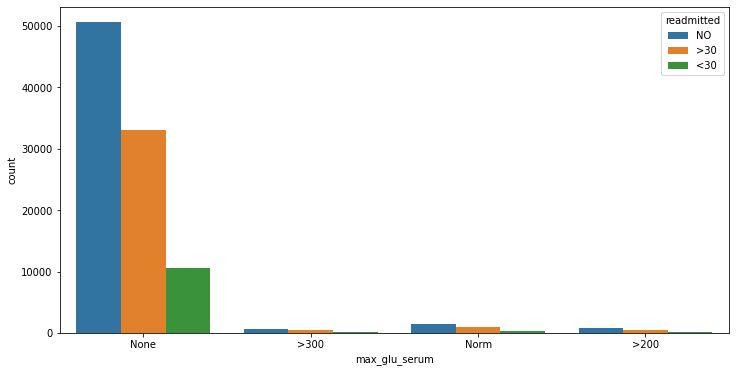

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='max_glu_serum',hue='readmitted')

In [ ]:
sns.pairplot(df, hue='readmitted')
#plota todas as variaveis numéricas e as correlações que elas possuem entre elas ou até com ela mesma
#mto pesado, deixamos pra rodar na próxima rs

#Correlação

In [ ]:
df.corr()
#0 = nenhuma correlação
#1 = correlação perfeita
#-1 = correlação inversamente perfeita (se um sobe o outro desce)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.317671,0.193234,0.466381,-0.009542,-0.009799,0.073408,0.220687
num_lab_procedures,0.317671,1.000000,0.058407,0.266993,-0.008556,-0.002227,0.039739,0.151594
num_procedures,0.193234,0.058407,1.000000,0.385538,-0.024937,-0.038369,-0.065843,0.072339
num_medications,0.466381,0.266993,0.385538,1.000000,0.044528,0.012964,0.064993,0.258605
number_outpatient,-0.009542,-0.008556,-0.024937,0.044528,1.000000,0.090941,0.106236,0.092458
number_emergency,-0.009799,-0.002227,-0.038369,0.012964,0.090941,1.000000,0.266382,0.054088
number_inpatient,0.073408,0.039739,-0.065843,0.064993,0.106236,0.266382,1.000000,0.103252
number_diagnoses,0.220687,0.151594,0.072339,0.258605,0.092458,0.054088,0.103252,1.000000


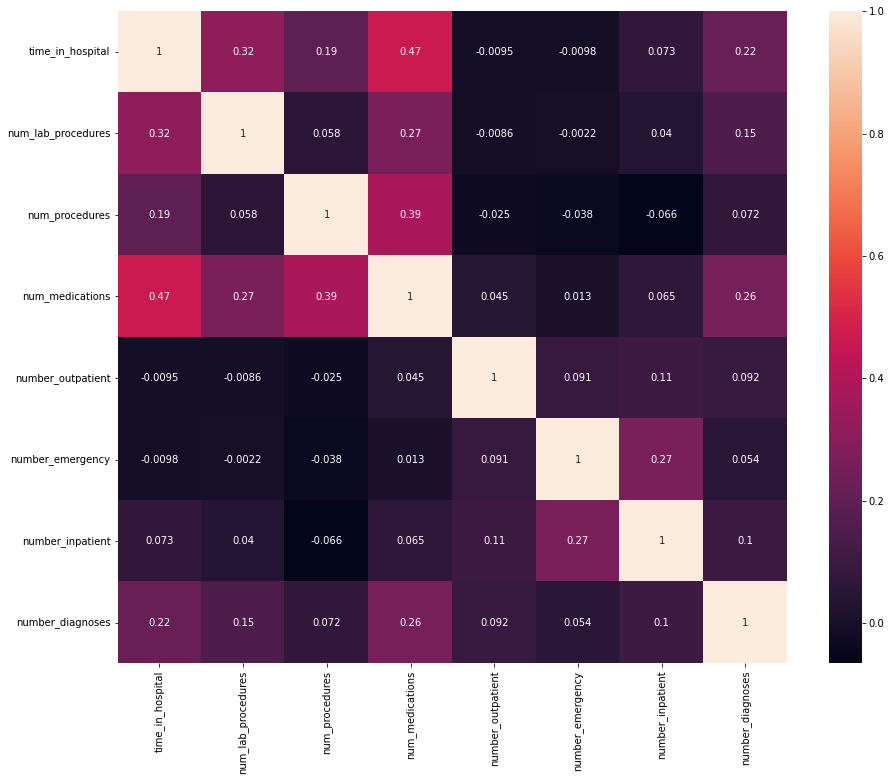

In [ ]:
#pearson (correlação default do pandas)
#indica correlação linear
#funcina melhor com dados na mesma escala de valores que se comportam de maneira parecida
#não consegue observar mundanças exóticas como formatos de curva
#vantegens: tem mais precisão nas correlações que apresentam linearidade
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

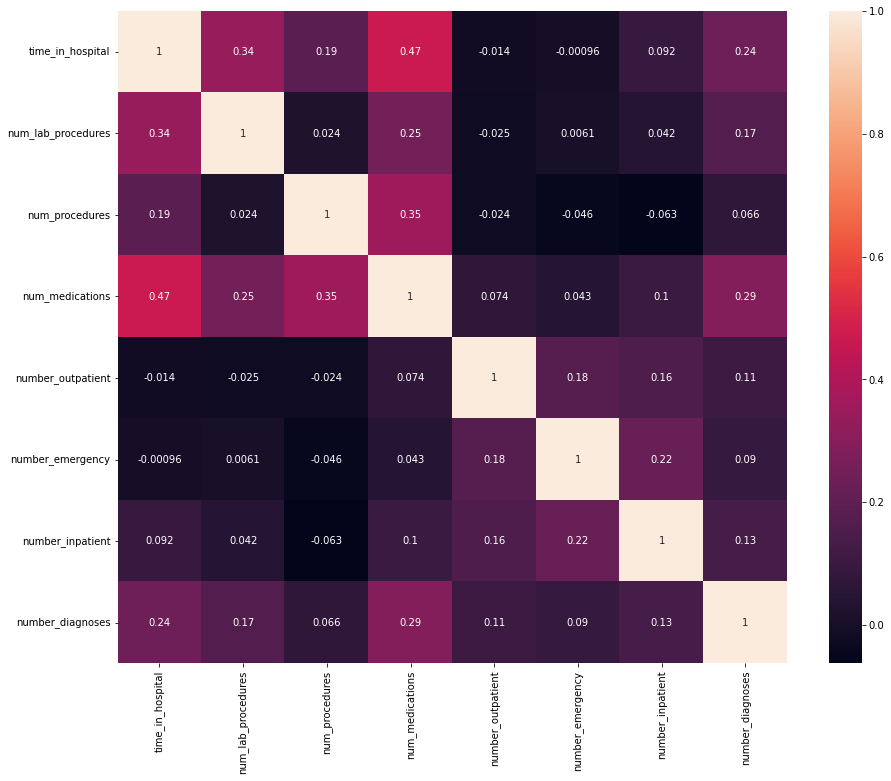

In [ ]:
#Spearman
#se um aumenta o outro aumenta também, não importa se é linear ou não
#observa melhor mudanças mais exóticas
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

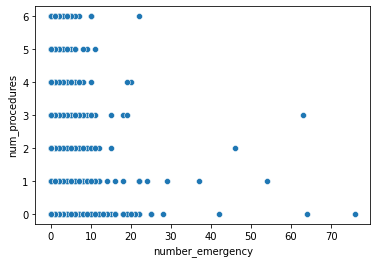

In [ ]:
sns.scatterplot(data=df,x='number_emergency', y='num_procedures')#pouca correlação

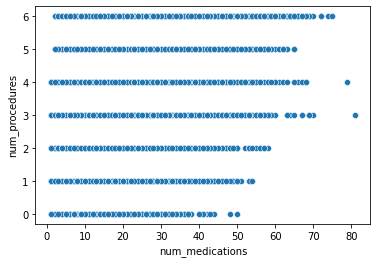

In [ ]:
sns.scatterplot(data=df,x='num_medications', y='num_procedures')#bastante correlação

In [ ]:
!pip install ppscore # não deu certo, tentar depois
# ele consegue gerar um gráfico em formato de mapa de calor em que ele inclui var categoricas e faz calculos de poder preditivo


In [ ]:
col_unicas = ['acetohexamide','troglitazone','glyburide-metformin','glipizide-metformin','metformin-pioglitazone']
df.drop(col_unicas,1,inplace=True)
#dropa colunas com valor preditivo duvidosos, ou seja MUITO ALTO

In [ ]:
df = df.loc[df['readmitted'] != '>30']
df.loc[df['readmitted'] == 'NO', 'readmitted'] = 0
df.loc[df['readmitted'] == '<30', 'readmitted'] = 1
df.readmitted = df.readmitted.astype('int64')
#tirando o target >30

In [ ]:
#one hot encoding: transformar as colunas categoricas em col numéricas ( 0 ou 1)
pd.get_dummies(df)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,...,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,41,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,0
2,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,1
3,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1
6,4,70,1,21,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,1,1,0,15,3,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1
101762,5,33,3,18,0,0,1,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,1
101763,1,53,0,9,1,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1
101764,10,45,2,21,0,0,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1


In [ ]:
df.to_csv('diabetis_preprocessed.csv')#salvar um novo csv com todas as alterações